# EDA

In [26]:
# import necessary packages
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [2]:
# read train set as a pandas dataframe
train_set = pd.read_csv('data/train_set.csv')
train_set.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,54,F,1,Unknown,Single,Unknown,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464
1,Attrited Customer,58,F,4,High School,Married,Unknown,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334
2,Existing Customer,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103
3,Existing Customer,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694
4,Existing Customer,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708


## Frequency Distribuition

In [3]:
# create functions to do the frequency distribuition
def barplot(figsize, title, data, x, y, xlabel, ylabel):
    '''Function to plot bar graphs to analyze the qualitative features'''
    # Plot the graph
    plt.figure(figsize=figsize)

    # Title
    plt.title(title, fontsize = 14)

    # Graph
    sns.barplot(data = data, x = x, y = y, 
                ci = None, palette = "Blues_d")

    # Label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig('images/eda/output_qualitative_' + xlabel + '.png')
    plt.show()


def frequency_quantitative_table(df, X, hist=False):
    '''Function that create frequency tables for quantitatives features.
    The number of classes are defined by sturges rule.
    
    :param df: (dataframe) 
    DataFrame that you are working.
    
    :param X: (series)
    Respective column that you want to analyze the frequencies.
    
    :param hist: (bool)
    Parameter that controls if the function return a histogram with boxplot to help in your analysis
    
    :return: (dataframe)
    Final dataframe with the resumed table. This table has the ollowing information:
    observed frequency, relative frequency and cumulated relative frequency. If param hist=True
    the function returns a histogram and boxplot to help in your analysis.
    '''
    # sturges rule to find a good number of classes
    n = df.shape[0]
    k = int(round(1 + (10/3) * np.log10(n), 0))

    # observed frequency for the variable
    observed_frequency = pd.value_counts(
        pd.cut(
            x = df[X],
            bins = k,
            include_lowest = True
        ),
        sort = False
    )

    # relative frequency for the variable
    relative_frequency = pd.value_counts(
        pd.cut(
            x = df[X],
            bins = k,
            include_lowest = True
        ),
        sort = False,
        normalize = True
    )
    relative_frequency = round(relative_frequency * 100, 1)

    # frequency table
    freq_dist_quant = pd.DataFrame(
        {'Observed Frequency': observed_frequency, 'Relative Frequency (%)': relative_frequency}
    )

    # add cumulative relative frequency
    freq_dist_quant['Cumulated Relative Frequency (%)'] = freq_dist_quant['Relative Frequency (%)'].cumsum()
    
    # optional thing that can show for you the histogram of the variable
    if hist==True:
        # calculate measures of central tendency
        mean = df[X].mean()
        median = df[X].median()
        # mode = df[X].mode()[0]

        # plot of boxplot and histogram
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (20,7), gridspec_kw= {"height_ratios": (0.2, 1)})

        sns.boxplot(data=df, x=X, ax=ax_box)
        ax_box.set_title('Distribution of the respective variable' , size=18)
        ax_box.axvline(mean, color='r', linestyle='--')
        ax_box.axvline(median, color='g', linestyle='-')
        # ax_box.axvline(mode, color='y', linestyle='-')
        ax_box.set(xlabel='')

        sns.histplot(data=df, x=X, ax=ax_hist, kde=True, bins=k)
        ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
        ax_hist.axvline(median, color='g', linestyle='-', label="Median")
        # ax_hist.axvline(mode, color='y', linestyle='-', label="Mode")
        
        ax_hist.legend()
        plt.savefig('images/eda/output_quantitative_' + X + '.png')
        plt.tight_layout()

    return freq_dist_quant

### Qualitative variables

The qualitative variables are:
* Attrition_Flag
* Gender
* Dependent_count
* Education_Level	
* Marital_Status
* Income_Category
* Card_Category
* Total_Relationship_Count	
* Months_Inactive_12_mon
* Contacts_Count_12_mon

In [4]:
# call a list with qualitative variables
qualitative_variables = [
    'Attrition_Flag',
    'Gender',
    'Dependent_count',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
    'Total_Relationship_Count',	
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon'
]

The variable that we are analyzing is: Attrition_Flag


,Frequency,Percentage (%)
Existing Customer,6801,83.952598
Attrited Customer,1300,16.047402


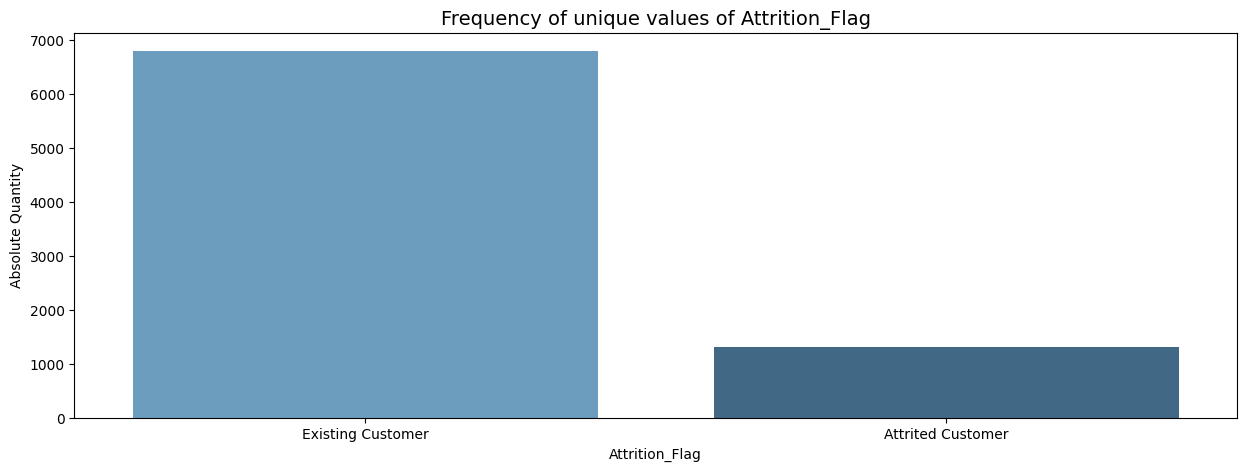

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Gender


,Frequency,Percentage (%)
F,4279,52.820639
M,3822,47.179361


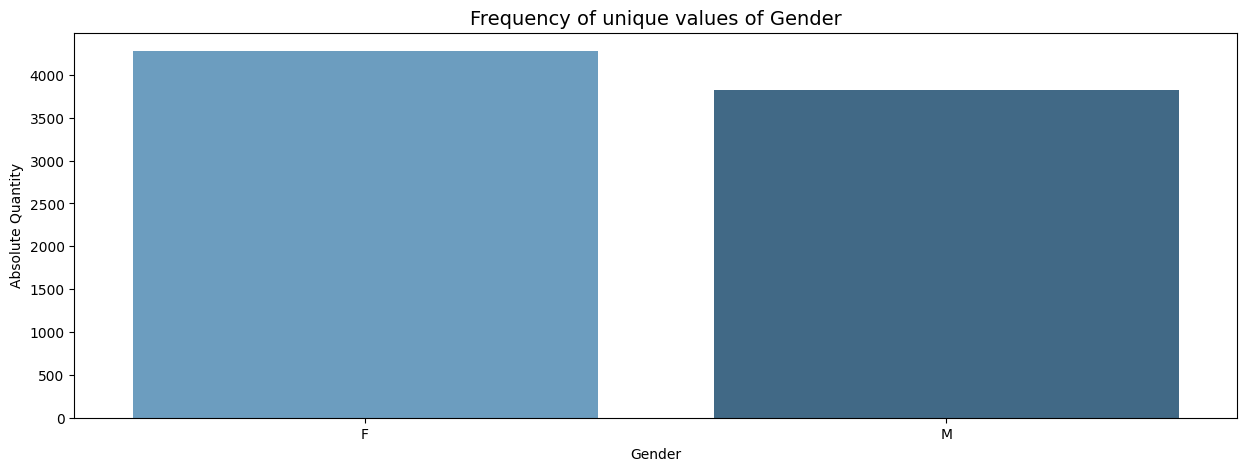

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Dependent_count


,Frequency,Percentage (%)
3,2222,27.428713
2,2150,26.539933
1,1465,18.084187
4,1212,14.961116
0,725,8.949512
5,327,4.036539


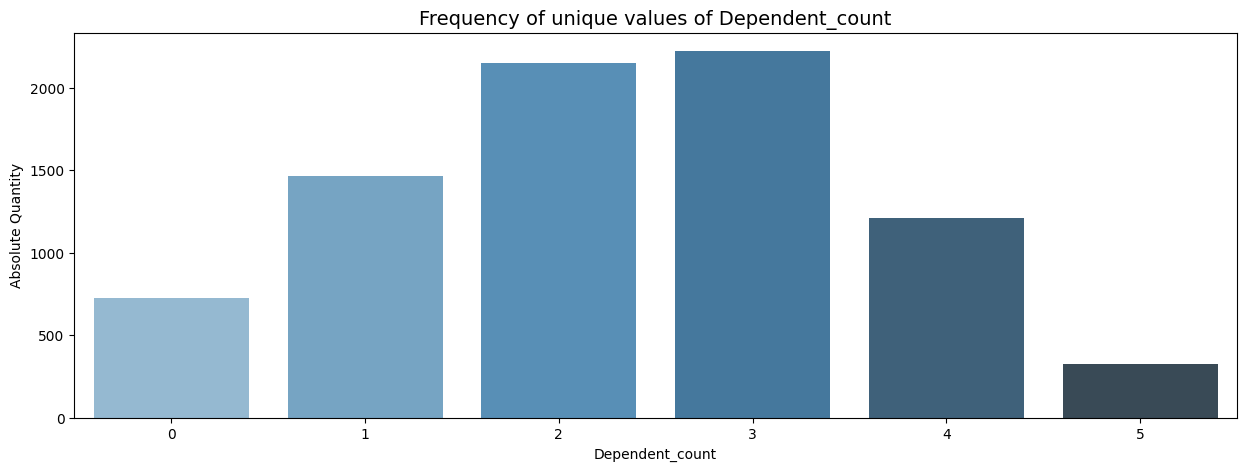

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Education_Level


,Frequency,Percentage (%)
Graduate,2528,31.206024
High School,1619,19.985187
Unknown,1205,14.874707
Uneducated,1171,14.455006
College,816,10.072831
Post-Graduate,407,5.024071
Doctorate,355,4.382175


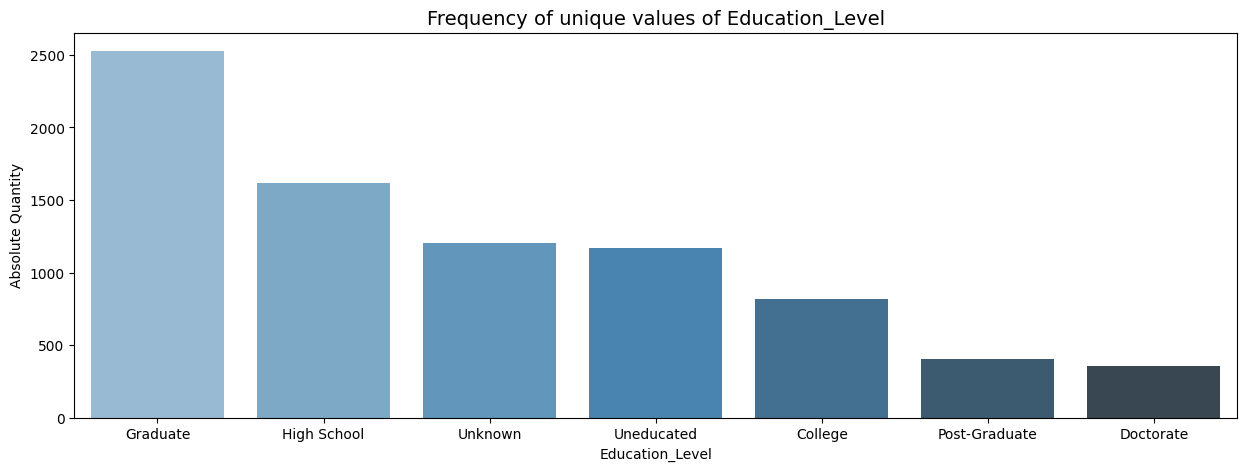

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Marital_Status


,Frequency,Percentage (%)
Married,3767,46.500432
Single,3144,38.810023
Divorced,611,7.542279
Unknown,579,7.147266


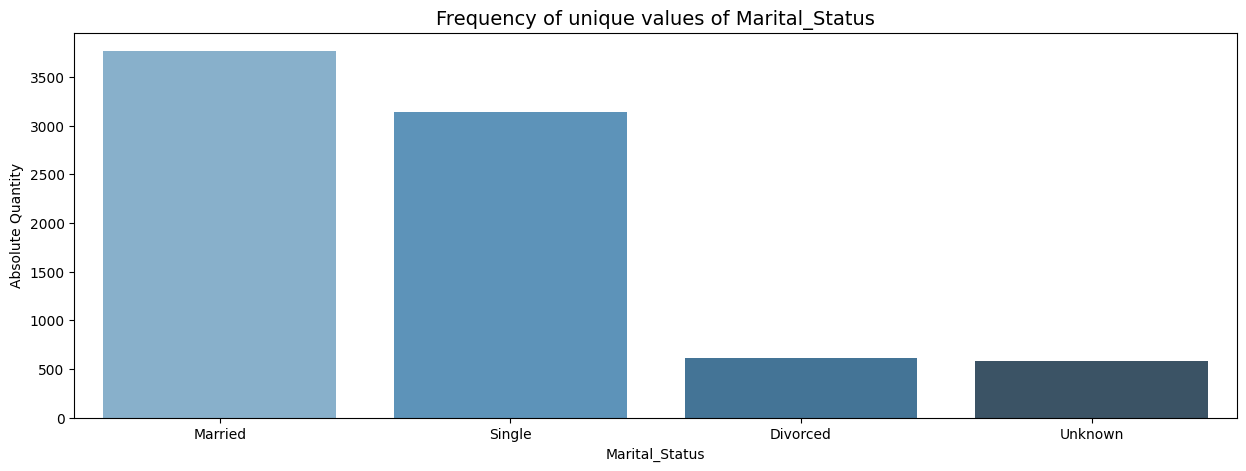

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Income_Category


,Frequency,Percentage (%)
Less than $40K,2812,34.711764
$40K - $60K,1453,17.936057
$80K - $120K,1237,15.269720
$60K - $80K,1122,13.850142
Unknown,889,10.973954
$120K +,588,7.258363


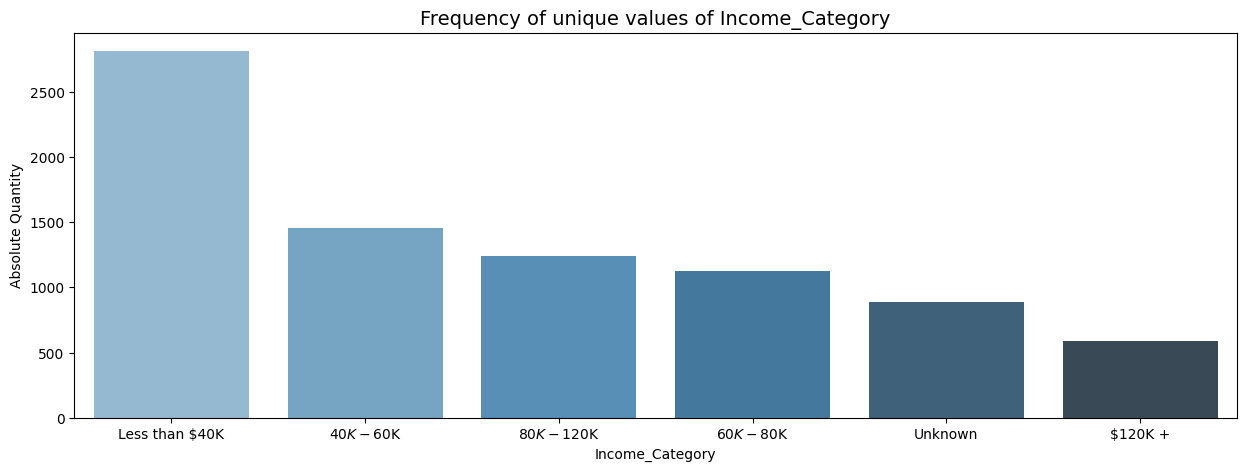

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Card_Category


,Frequency,Percentage (%)
Blue,7557,93.284780
Silver,436,5.382052
Gold,93,1.148006
Platinum,15,0.185162


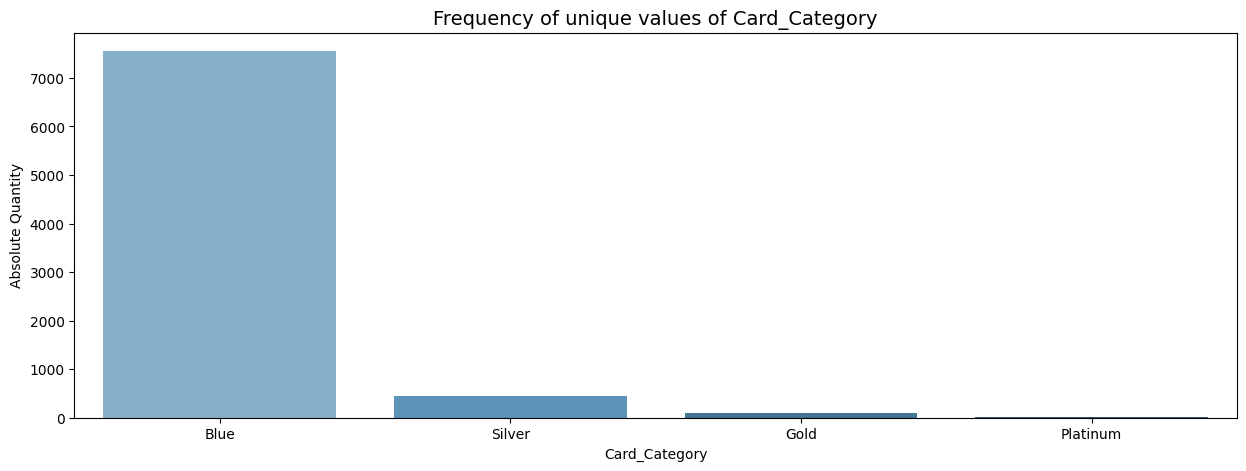

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Total_Relationship_Count


,Frequency,Percentage (%)
3,1852,22.861375
4,1539,18.997655
5,1511,18.652018
6,1488,18.368103
2,985,12.158993
1,726,8.961857


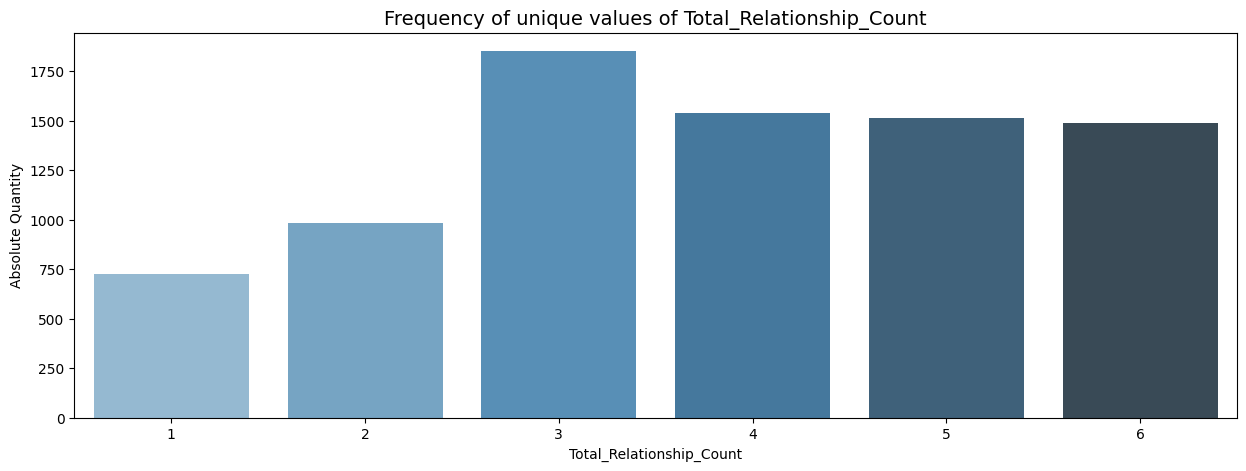

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Months_Inactive_12_mon


,Frequency,Percentage (%)
3,3094,38.192816
2,2611,32.230589
1,1780,21.972596
4,346,4.271078
5,144,1.777558
6,104,1.283792
0,22,0.271571


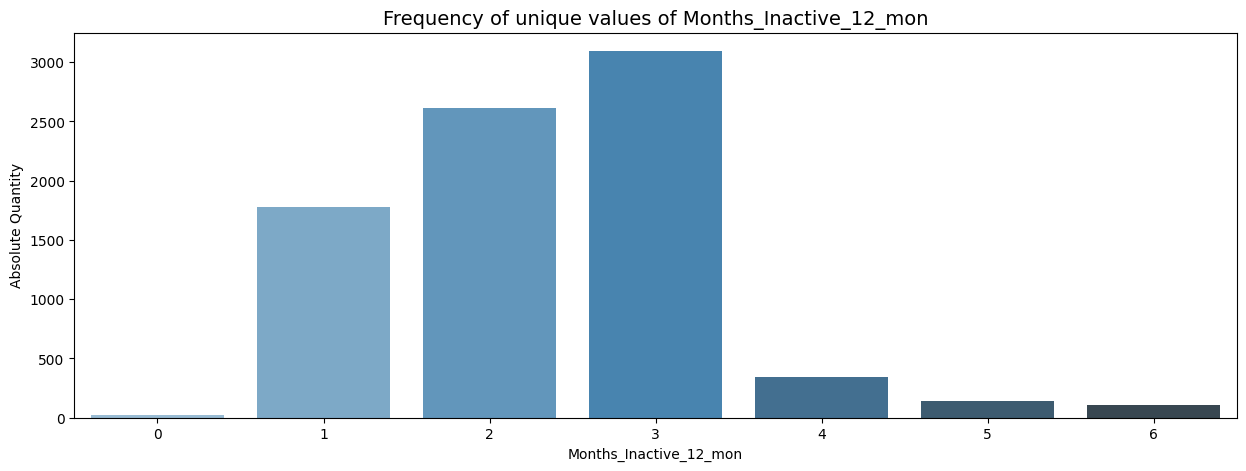

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Contacts_Count_12_mon


,Frequency,Percentage (%)
3,2716,33.526725
2,2596,32.045426
1,1207,14.899395
4,1092,13.479817
0,312,3.851376
5,133,1.641773
6,45,0.555487


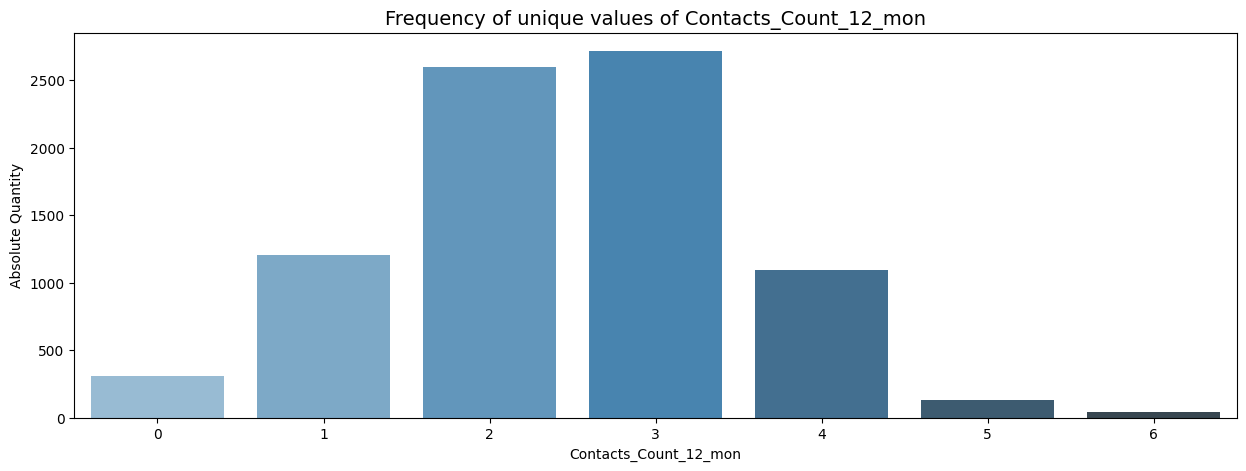

------------------------------------------------------------------------------------------


In [5]:
# plot frequency tables and bar graphs for every qualitative variable
for var in qualitative_variables:
    print('The variable that we are analyzing is:', var)
    # 1. creating the table
    var_frequency = train_set[var].value_counts()
    var_percentage = train_set[var].value_counts(normalize = True) * 100

    var_frequency_table = pd.DataFrame({'Frequency': var_frequency, 'Percentage (%)': var_percentage})
    display(var_frequency_table)

    # 2. plot the bar graph
    barplot(
        (15, 5), 'Frequency of unique values of ' + var, train_set, 
        train_set[var].value_counts().index, train_set[var].value_counts(),
        var, 'Absolute Quantity'
    )
    print('------------------------------------------------------------------------------------------')

### Quantitative variables

The quantitative variables are:
* Customer_Age
* Months_on_book
* Credit_Limit
* Total_Revolving_Bal	
* Avg_Open_To_Buy	
* Total_Amt_Chng_Q4_Q1
* Total_Trans_Amt
* Total_Trans_Ct
* Total_Ct_Chng_Q4_Q1
* Avg_Utilization_Ratio

In [6]:
# call a list with quantitative variables
quantitative_variables = [
    'Customer_Age',
    'Months_on_book',
    'Credit_Limit',
    'Total_Revolving_Bal',	
    'Avg_Open_To_Buy',	
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(25.955, 29.143]",159,2.0,2.0
"(29.143, 32.286]",221,2.7,4.7
"(32.286, 35.429]",367,4.5,9.2
"(35.429, 38.571]",623,7.7,16.9
"(38.571, 41.714]",879,10.9,27.8
"(41.714, 44.857]",1083,13.4,41.2
"(44.857, 48.0]",1537,19.0,60.2
"(48.0, 51.143]",1087,13.4,73.6
"(51.143, 54.286]",852,10.5,84.1
"(54.286, 57.429]",626,7.7,91.8


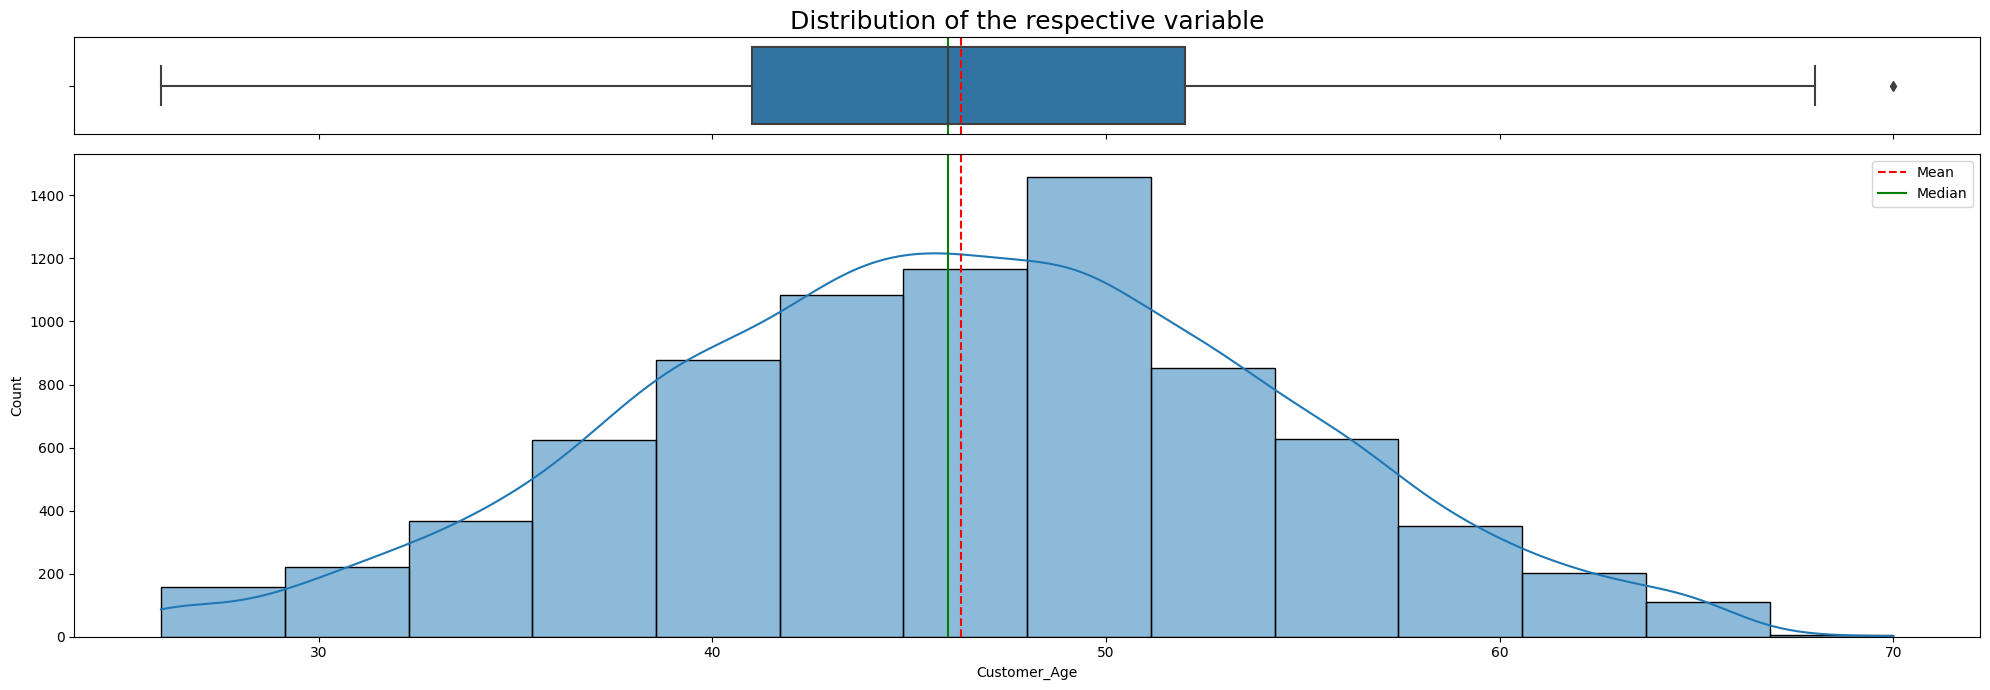

In [7]:
# plot frequency tables for 'Customer_Age'
frequency_quantitative_table(train_set, 'Customer_Age', hist=True)

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(12.956000000000001, 16.071]",118,1.5,1.5
"(16.071, 19.143]",131,1.6,3.1
"(19.143, 22.214]",217,2.7,5.8
"(22.214, 25.286]",353,4.4,10.2
"(25.286, 28.357]",546,6.7,16.9
"(28.357, 31.429]",677,8.4,25.3
"(31.429, 34.5]",758,9.4,34.7
"(34.5, 37.571]",2482,30.6,65.3
"(37.571, 40.643]",819,10.1,75.4
"(40.643, 43.714]",665,8.2,83.6


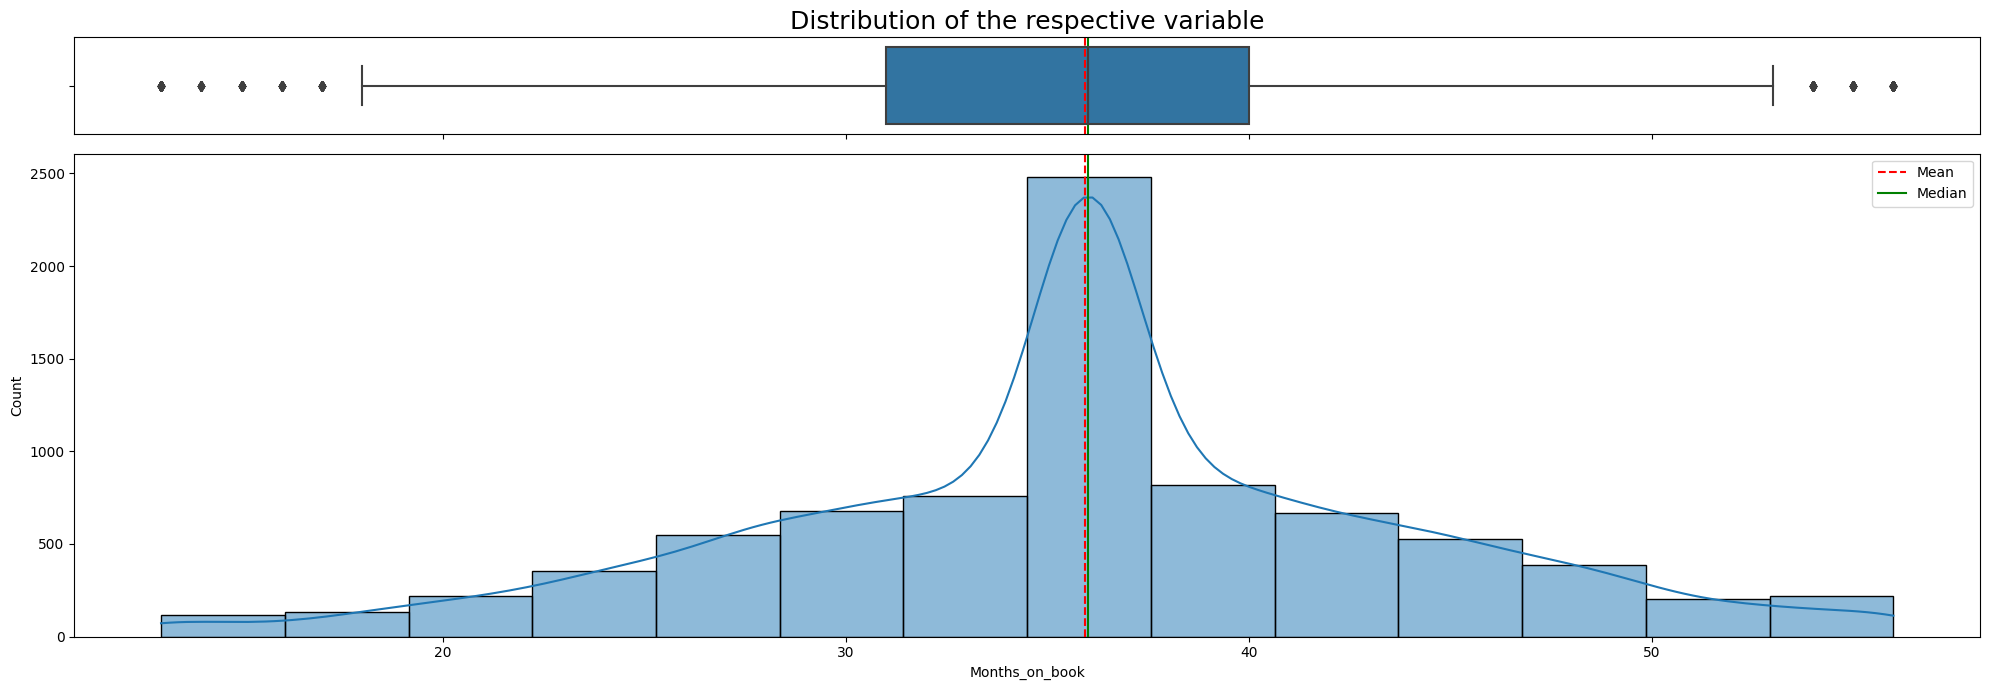

In [8]:
# plot frequency tables for 'Months_on_book'
frequency_quantitative_table(train_set, 'Months_on_book', hist=True)

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(1405.221, 3800.993]",3584,44.2,44.2
"(3800.993, 6163.686]",1226,15.1,59.3
"(6163.686, 8526.379]",718,8.9,68.2
"(8526.379, 10889.071]",507,6.3,74.5
"(10889.071, 13251.764]",386,4.8,79.3
"(13251.764, 15614.457]",276,3.4,82.7
"(15614.457, 17977.15]",219,2.7,85.4
"(17977.15, 20339.843]",189,2.3,87.7
"(20339.843, 22702.536]",144,1.8,89.5
"(22702.536, 25065.229]",147,1.8,91.3


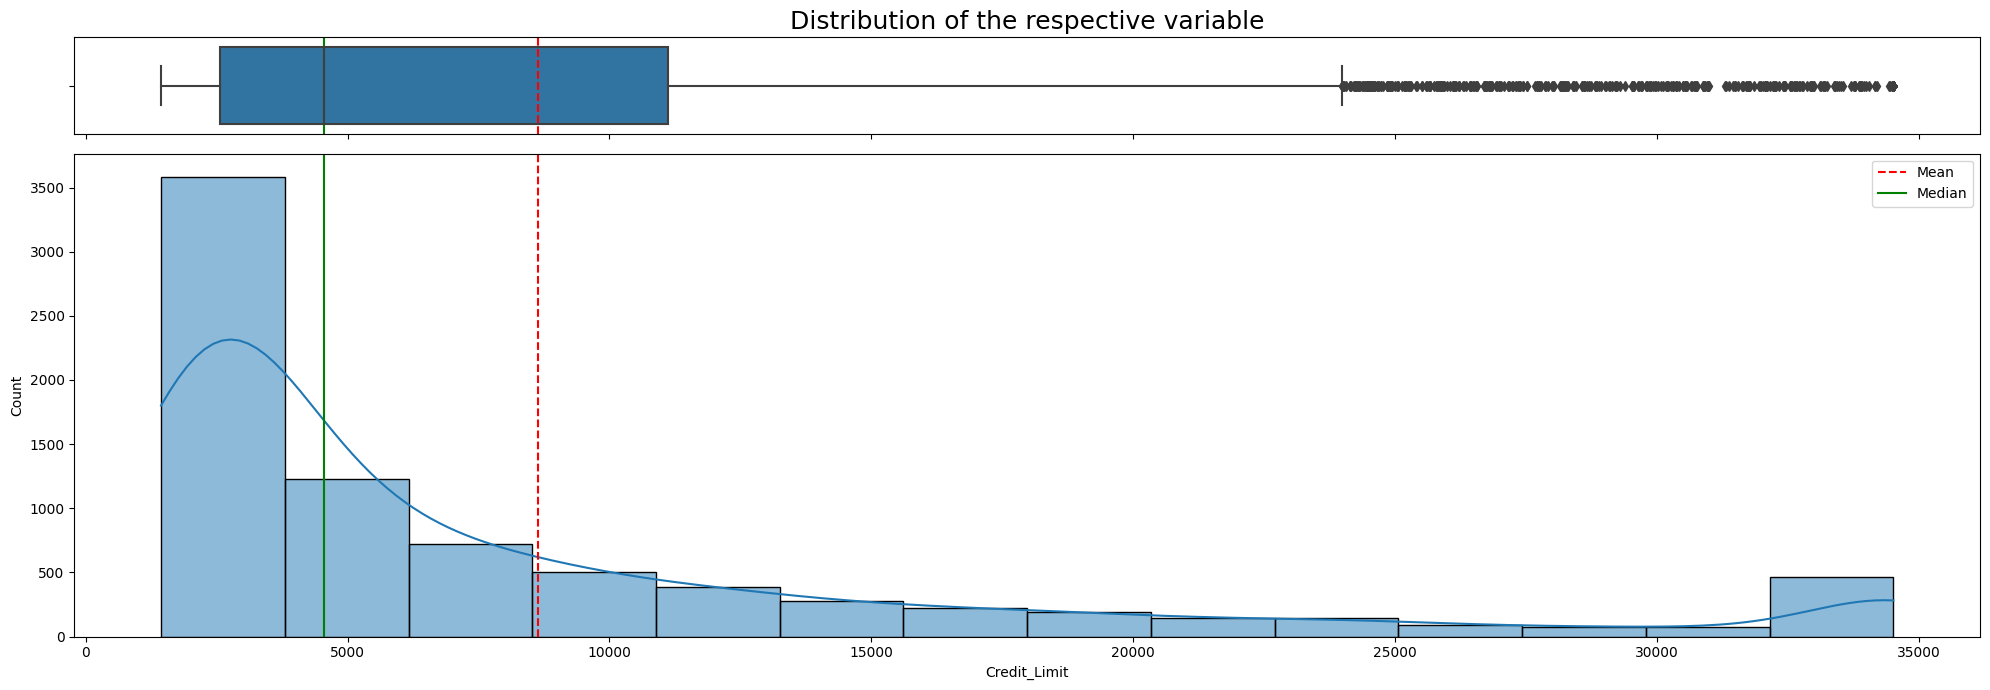

In [9]:
# plot frequency tables for 'Credit_Limit'
frequency_quantitative_table(train_set, 'Credit_Limit', hist=True)

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(-2.518, 179.786]",1993,24.6,24.6
"(179.786, 359.571]",41,0.5,25.1
"(359.571, 539.357]",84,1.0,26.1
"(539.357, 719.143]",250,3.1,29.2
"(719.143, 898.929]",481,5.9,35.1
"(898.929, 1078.714]",521,6.4,41.5
"(1078.714, 1258.5]",632,7.8,49.3
"(1258.5, 1438.286]",691,8.5,57.8
"(1438.286, 1618.071]",744,9.2,67.0
"(1618.071, 1797.857]",704,8.7,75.7


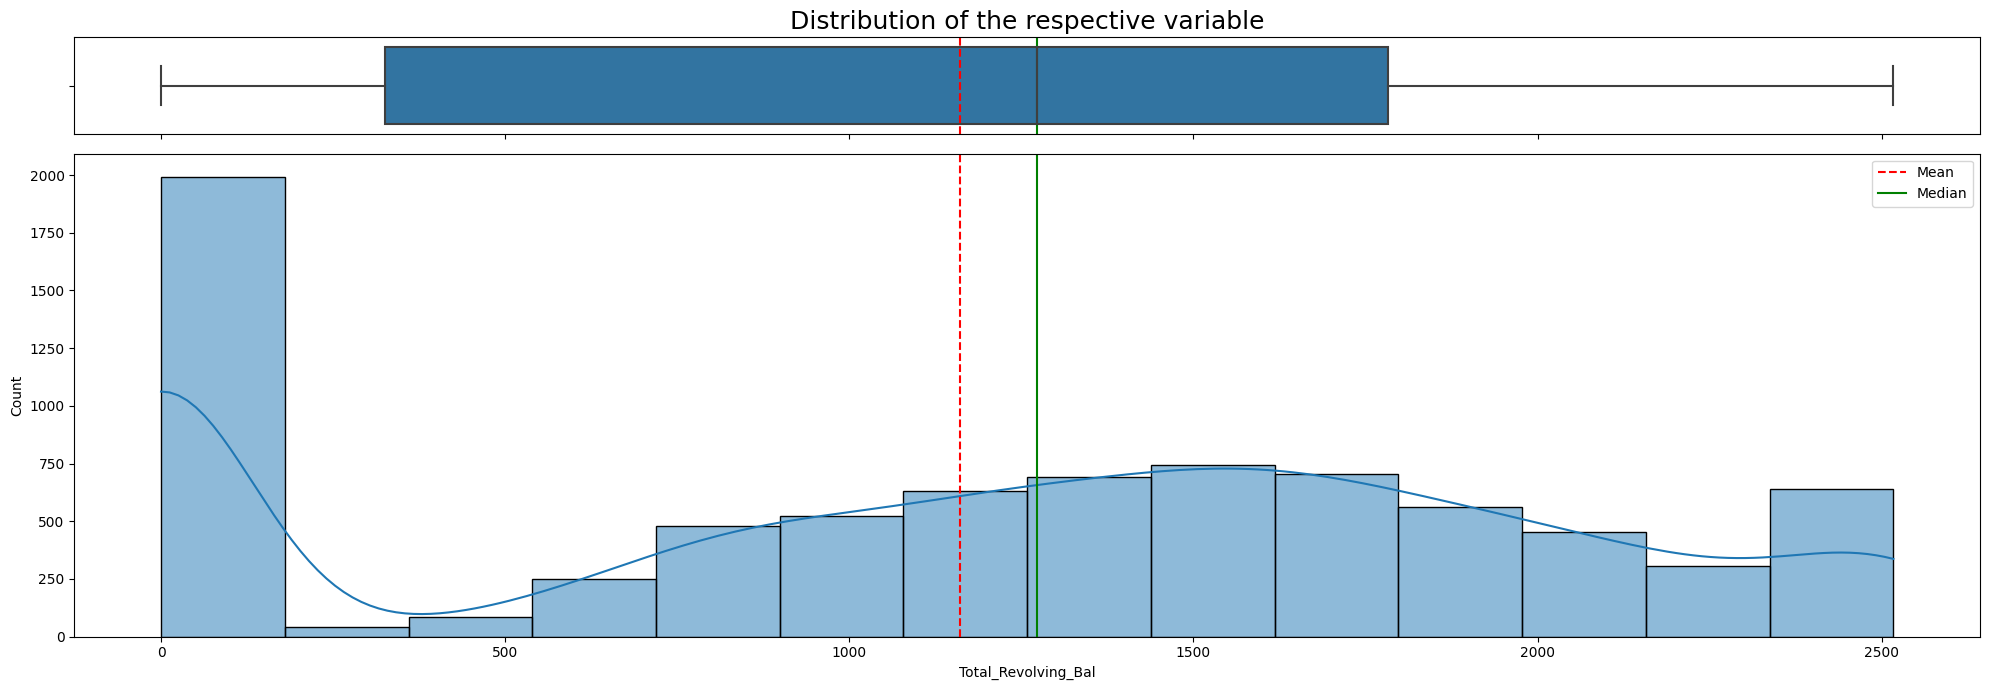

In [10]:
# plot frequency tables for 'Total_Revolving_Bal'
frequency_quantitative_table(train_set, 'Total_Revolving_Bal', hist=True)

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(-31.514000000000003, 2468.214]",3418,42.2,42.2
"(2468.214, 4933.429]",1354,16.7,58.9
"(4933.429, 7398.643]",760,9.4,68.3
"(7398.643, 9863.857]",534,6.6,74.9
"(9863.857, 12329.071]",384,4.7,79.6
"(12329.071, 14794.286]",276,3.4,83.0
"(14794.286, 17259.5]",232,2.9,85.9
"(17259.5, 19724.714]",196,2.4,88.3
"(19724.714, 22189.929]",147,1.8,90.1
"(22189.929, 24655.143]",126,1.6,91.7


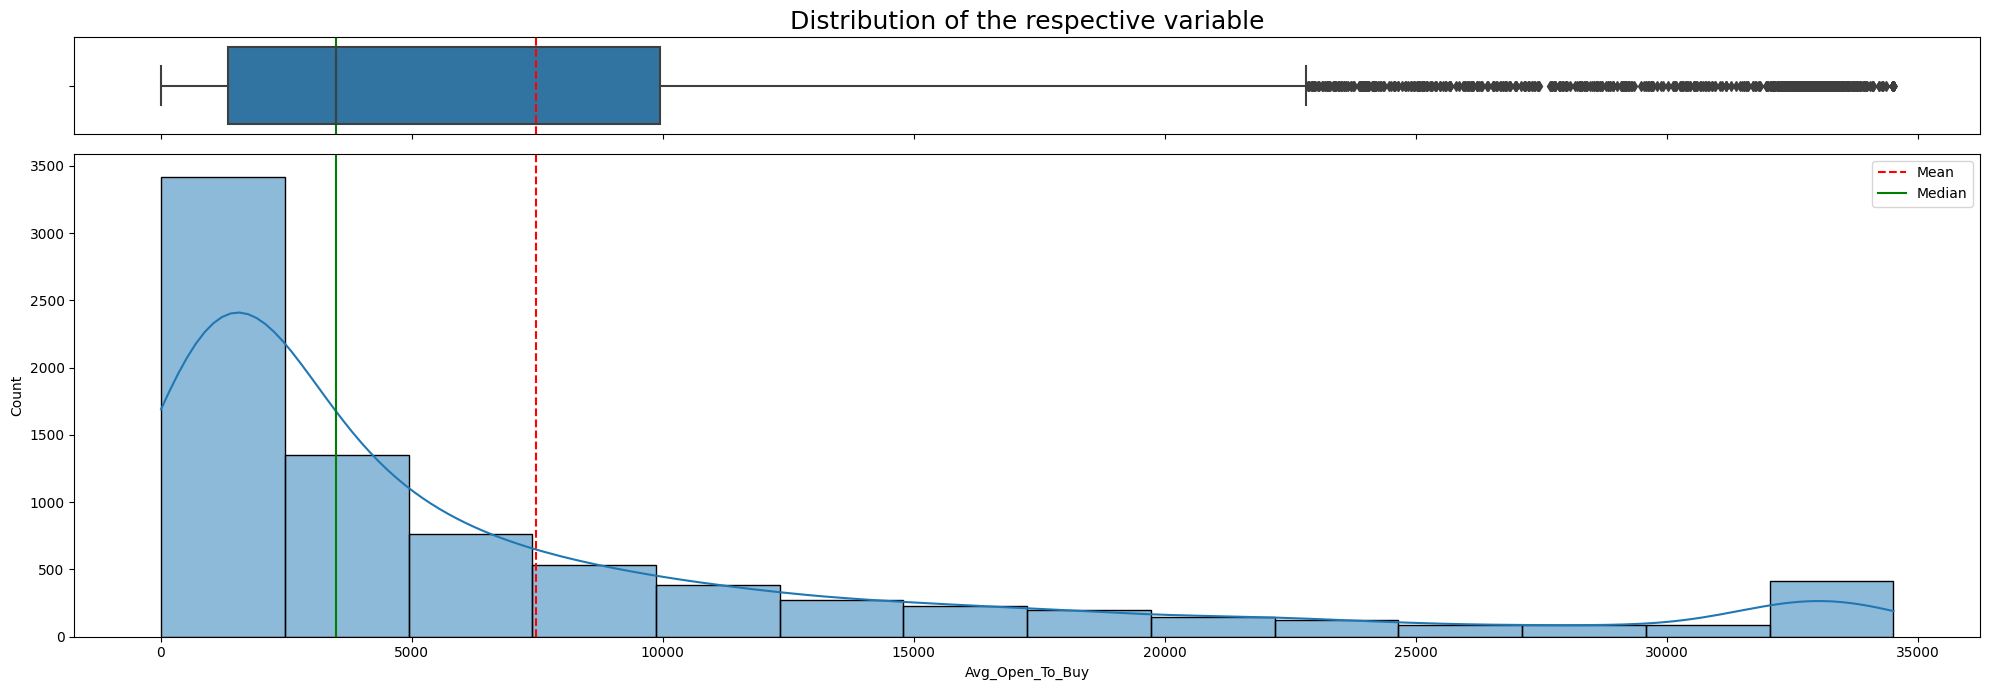

In [11]:
# plot frequency tables for 'Avg_Open_To_Buy'
frequency_quantitative_table(train_set, 'Avg_Open_To_Buy', hist=True)

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(-0.00368, 0.191]",17,0.2,0.2
"(0.191, 0.382]",123,1.5,1.7
"(0.382, 0.573]",1097,13.5,15.2
"(0.573, 0.764]",3309,40.8,56.0
"(0.764, 0.955]",2469,30.5,86.5
"(0.955, 1.146]",743,9.2,95.7
"(1.146, 1.338]",182,2.2,97.9
"(1.338, 1.529]",85,1.0,98.9
"(1.529, 1.72]",45,0.6,99.5
"(1.72, 1.911]",13,0.2,99.7


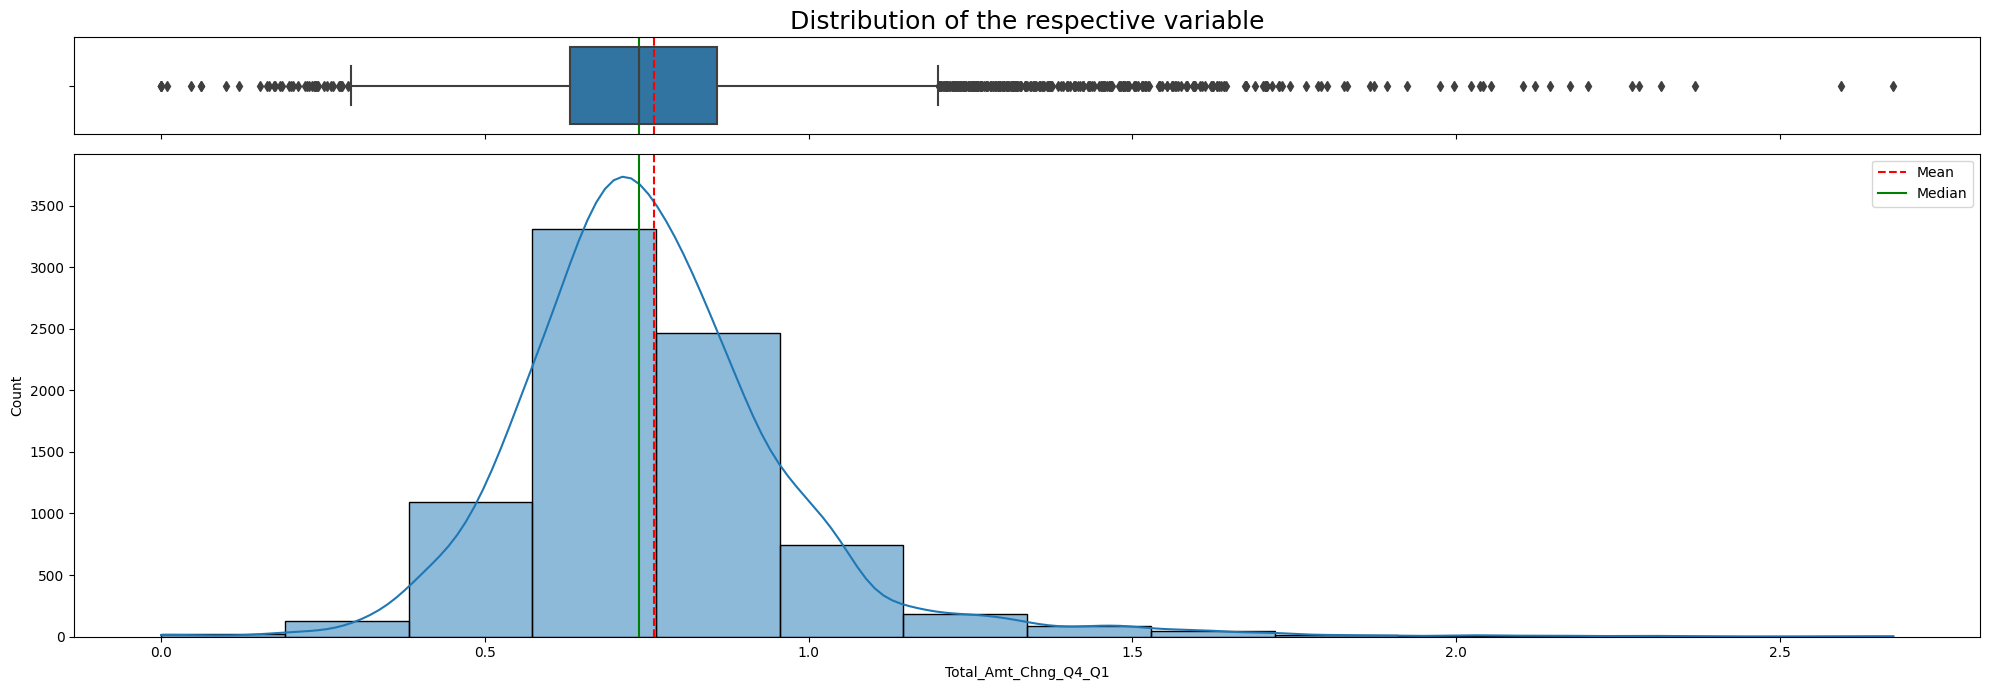

In [12]:
# plot frequency tables for 'Total_Amt_Chng_Q4_Q1'
frequency_quantitative_table(train_set, 'Total_Amt_Chng_Q4_Q1', hist=True)

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(492.02500000000003, 1793.857]",1367,16.9,16.9
"(1793.857, 3077.714]",1800,22.2,39.1
"(3077.714, 4361.571]",1944,24.0,63.1
"(4361.571, 5645.429]",1830,22.6,85.7
"(5645.429, 6929.286]",32,0.4,86.1
"(6929.286, 8213.143]",319,3.9,90.0
"(8213.143, 9497.0]",188,2.3,92.3
"(9497.0, 10780.857]",16,0.2,92.5
"(10780.857, 12064.714]",2,0.0,92.5
"(12064.714, 13348.571]",64,0.8,93.3


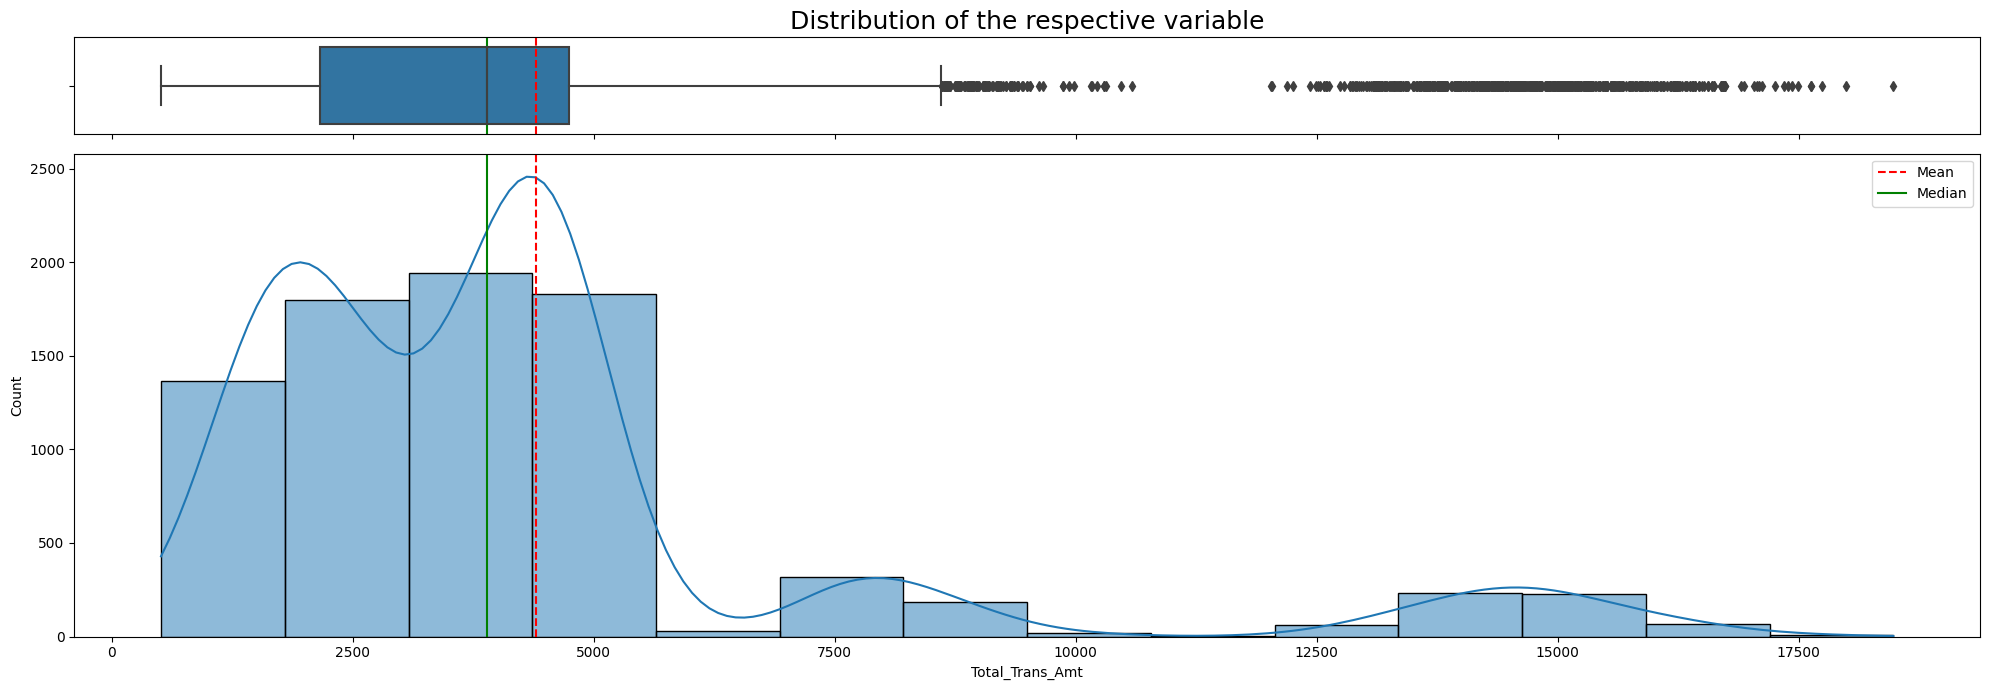

In [13]:
# plot frequency tables for 'Total_Trans_Amt'
frequency_quantitative_table(train_set, 'Total_Trans_Amt', hist=True)

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(9.870000000000001, 19.214]",85,1.0,1.0
"(19.214, 28.429]",350,4.3,5.3
"(28.429, 37.643]",799,9.9,15.2
"(37.643, 46.857]",940,11.6,26.8
"(46.857, 56.071]",743,9.2,36.0
"(56.071, 65.286]",891,11.0,47.0
"(65.286, 74.5]",1326,16.4,63.4
"(74.5, 83.714]",1387,17.1,80.5
"(83.714, 92.929]",782,9.7,90.2
"(92.929, 102.143]",315,3.9,94.1


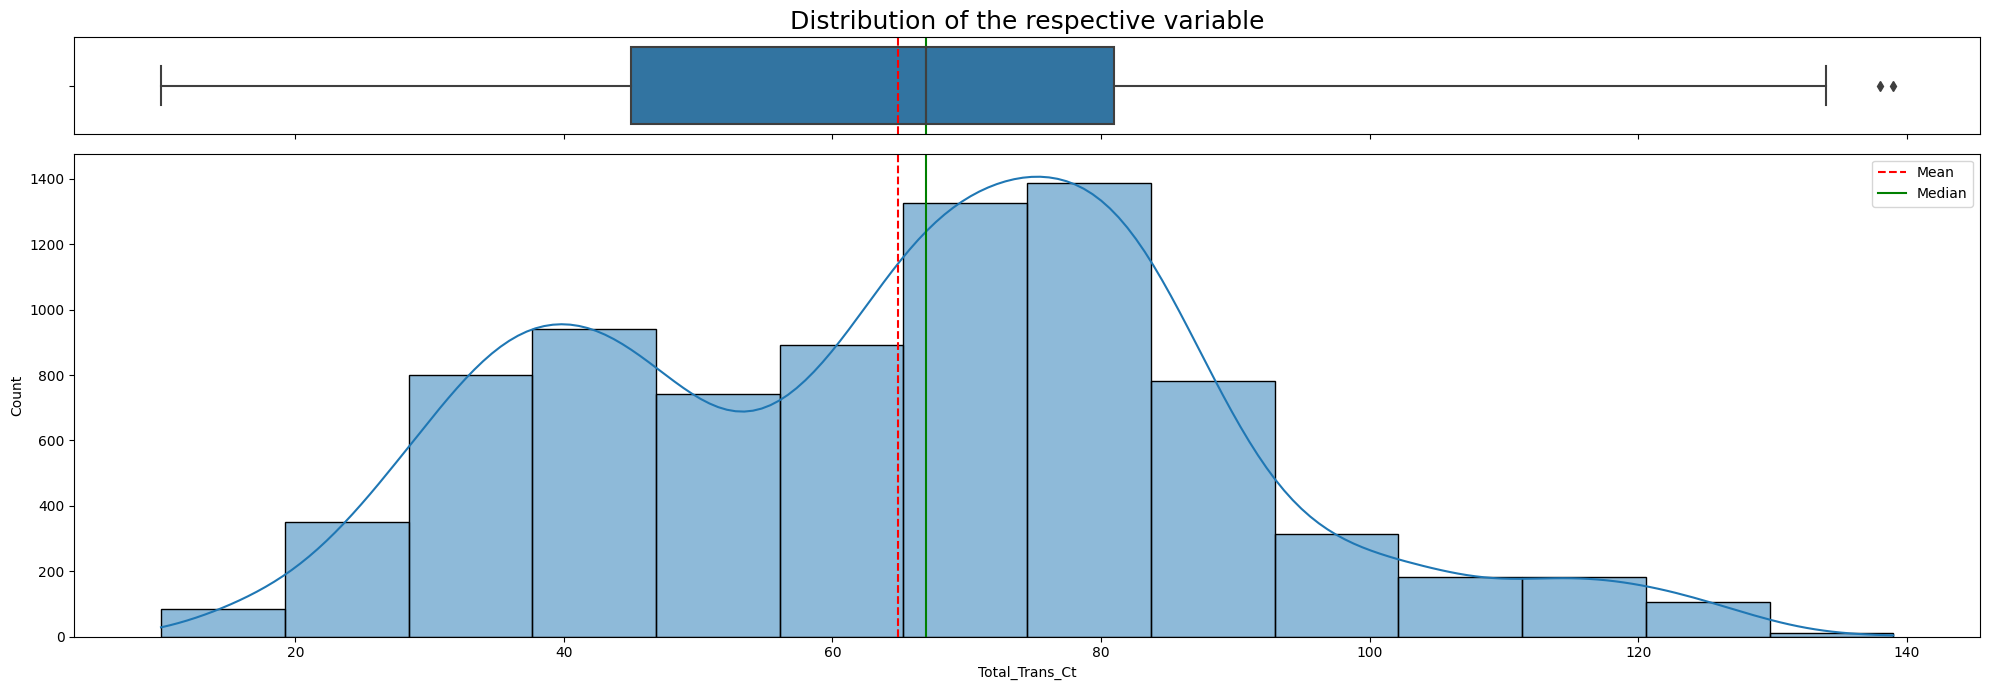

In [14]:
# plot frequency tables for 'Total_Trans_Ct'
frequency_quantitative_table(train_set, 'Total_Trans_Ct', hist=True)

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(-0.004710000000000001, 0.265]",133,1.6,1.6
"(0.265, 0.531]",1287,15.9,17.5
"(0.531, 0.796]",4305,53.1,70.6
"(0.796, 1.061]",1960,24.2,94.8
"(1.061, 1.326]",287,3.5,98.3
"(1.326, 1.592]",75,0.9,99.2
"(1.592, 1.857]",21,0.3,99.5
"(1.857, 2.122]",13,0.2,99.7
"(2.122, 2.388]",6,0.1,99.8
"(2.388, 2.653]",7,0.1,99.9


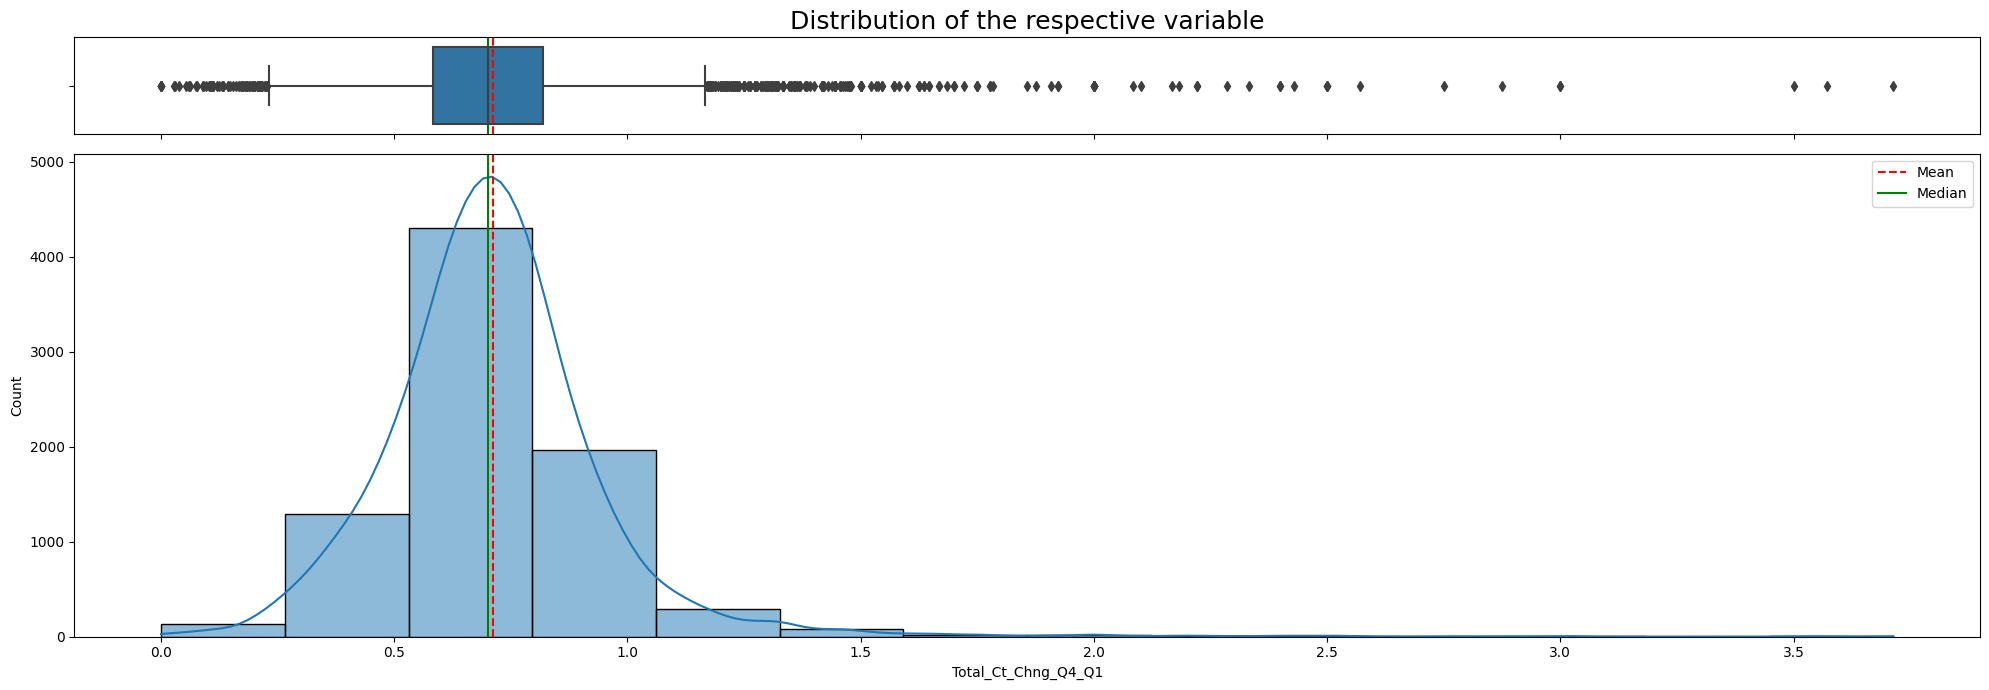

In [15]:
# plot frequency tables for 'Total_Ct_Chng_Q4_Q1'
frequency_quantitative_table(train_set, 'Total_Ct_Chng_Q4_Q1', hist=True)

,Observed Frequency,Relative Frequency (%),Cumulated Relative Frequency (%)
"(-0.001999, 0.0714]",2817,34.8,34.8
"(0.0714, 0.143]",926,11.4,46.2
"(0.143, 0.214]",657,8.1,54.3
"(0.214, 0.285]",528,6.5,60.8
"(0.285, 0.357]",422,5.2,66.0
"(0.357, 0.428]",338,4.2,70.2
"(0.428, 0.5]",401,5.0,75.2
"(0.5, 0.571]",388,4.8,80.0
"(0.571, 0.642]",459,5.7,85.7
"(0.642, 0.714]",399,4.9,90.6


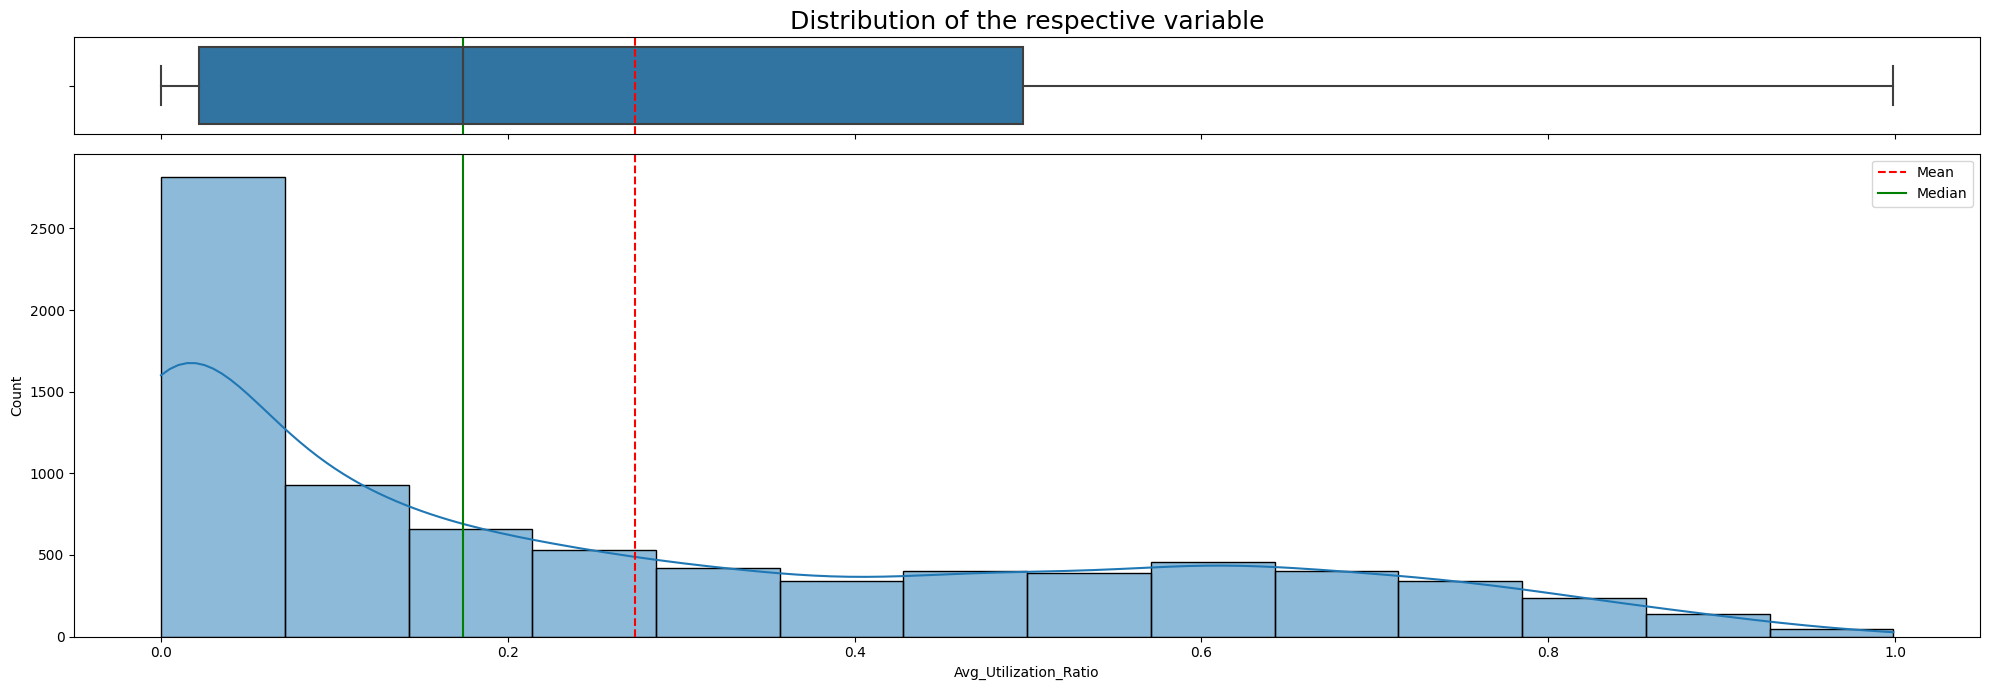

In [16]:
# plot frequency tables for 'Avg_Utilization_Ratio'
frequency_quantitative_table(train_set, 'Avg_Utilization_Ratio', hist=True)

## Summary Measures

In [22]:
# See the statistical summary of features
train_set[quantitative_variables].describe()

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.306382,35.923590,8636.548068,1160.382792,7476.165276,0.760809,4402.988150,64.907789,0.712176,0.273187
std,8.022527,8.024359,9086.419557,815.504293,9080.279910,0.216668,3401.709545,23.556379,0.239321,0.274595
min,26.000000,13.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,31.000000,2555.000000,326.000000,1341.000000,0.632000,2160.000000,45.000000,0.583000,0.022000
50%,46.000000,36.000000,4549.000000,1273.000000,3495.000000,0.738000,3897.000000,67.000000,0.702000,0.174000
75%,52.000000,40.000000,11128.000000,1782.000000,9942.000000,0.859000,4739.000000,81.000000,0.818000,0.497000
max,70.000000,56.000000,34516.000000,2517.000000,34516.000000,2.675000,18484.000000,139.000000,3.714000,0.999000


In [23]:
# shape measurements
print('Skew:', '\n')
print(train_set[quantitative_variables].skew(), '\n')
print('Kurtosis:', '\n')
print(train_set[quantitative_variables].kurtosis())

Skew: 

Customer_Age            -0.043813
Months_on_book          -0.109430
Credit_Limit             1.657609
Total_Revolving_Bal     -0.144484
Avg_Open_To_Buy          1.654005
Total_Amt_Chng_Q4_Q1     1.491324
Total_Trans_Amt          2.047951
Total_Trans_Ct           0.153617
Total_Ct_Chng_Q4_Q1      2.126865
Avg_Utilization_Ratio    0.726094
dtype: float64 

Kurtosis: 

Customer_Age             -0.311281
Months_on_book            0.357466
Credit_Limit              1.777607
Total_Revolving_Bal      -1.149188
Avg_Open_To_Buy           1.772613
Total_Amt_Chng_Q4_Q1      6.621302
Total_Trans_Amt           3.904927
Total_Trans_Ct           -0.371338
Total_Ct_Chng_Q4_Q1      16.555569
Avg_Utilization_Ratio    -0.779161
dtype: float64


## Association Between Qualitative variables

In [27]:
def chi_sq_test(cross_tabs):
    """
    Prints the Chi-Squared Statistic, p-value, degress of freedom from a Chi-Squared test,
    and Tschuprow coefficient
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    chi2, p, dof, con_table = stats.chi2_contingency(cross_tabs)
    print(f'chi-squared = {chi2}\np value= {p}\ndegrees of freedom = {dof}')
    print('Tschuprow coefficient:', association(cross_tabs, method='tschuprow'))

In [32]:
# qualitative associations
print('Associations between qualitative independent features and label\n')
for var in qualitative_variables:
    print('The analyzed feature with label is:', var)
    tabs1 = pd.crosstab(train_set.Attrition_Flag, train_set[var])
    chi_sq_test(tabs1)

    print('------------------------------------------------------------------------------------------')

Associations between qualitative independent features and label

The analyzed feature with label is: Attrition_Flag
chi-squared = 8093.57901347047
p value= 0.0
degrees of freedom = 1
Tschuprow coefficient: 1.0
------------------------------------------------------------------------------------------
The analyzed feature with label is: Gender
chi-squared = 17.929652542915463
p value= 2.2922183374198277e-05
degrees of freedom = 1
Tschuprow coefficient: 0.047382189075421216
------------------------------------------------------------------------------------------
The analyzed feature with label is: Dependent_count
chi-squared = 6.552109006206445
p value= 0.25613700535949785
degrees of freedom = 5
Tschuprow coefficient: 0.019018608558954334
------------------------------------------------------------------------------------------
The analyzed feature with label is: Education_Level
chi-squared = 17.70852764651303
p value= 0.007003416184988661
degrees of freedom = 6
Tschuprow coefficient: 0.

## Association Between Quantitative variables

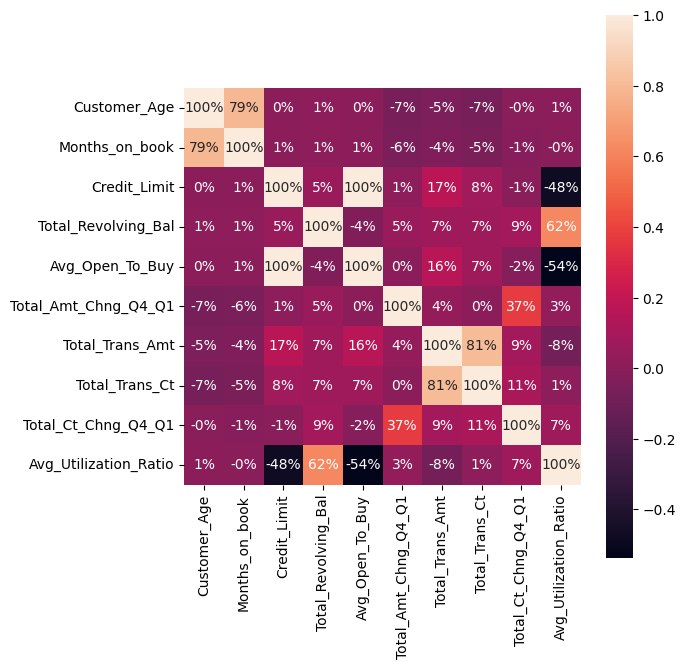

In [35]:
# pearson correlation
corr = train_set[quantitative_variables].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.savefig('images/eda/output_quantitative_pearsoncorr.png')
plt.tight_layout()

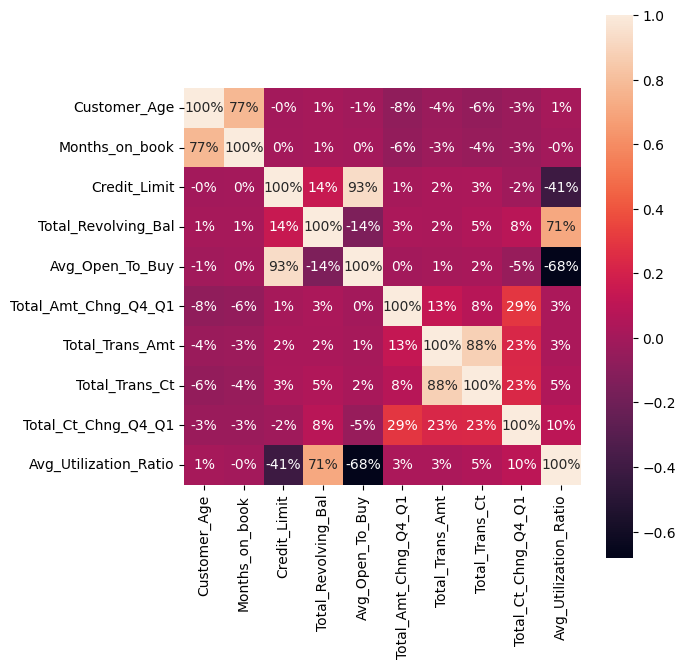

In [36]:
# spearman correlation
corr = train_set[quantitative_variables].corr(method='spearman')
plt.figure(figsize=(7,7))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.savefig('images/eda/output_quantitative_spearmancorr.png')
plt.tight_layout()

## Association Between Quantitative and Qualitative Variables

In [39]:
# Summary measures for quantitative independent features and label to search for relationships
for var in quantitative_variables:
    print('The quantitative variable is:', var)
    print(train_set.groupby('Attrition_Flag')[var].agg(['min', 'max', 'mean', 'var', 'std']))
    print('------------------------------------------------------------------------------------------')

The quantitative variable is: Customer_Age
                   min  max       mean        var       std
Attrition_Flag                                             
Attrited Customer   26   68  46.952308  58.051611  7.619161
Existing Customer   26   70  46.182914  65.480655  8.092012
------------------------------------------------------------------------------------------
The quantitative variable is: Months_on_book
                   min  max       mean       var       std
Attrition_Flag                                            
Attrited Customer   13   56  36.332308  61.57078  7.846705
Existing Customer   13   56  35.845464  64.90038  8.056077
------------------------------------------------------------------------------------------
The quantitative variable is: Credit_Limit
                      min      max         mean           var          std
Attrition_Flag                                                            
Attrited Customer  1438.3  34516.0  8128.715385  8.437667e+07